In [ ]:
!pip install graphviz
!pip install pydotplus


In [ ]:
# Decision Tree

# A decision tree is a flowchart-like structure where:
# - Each internal node represents a feature
# - Each branch represents a decision rule
# - Each leaf node represents an outcome

# The top node is called the root node.
# It splits the data based on feature values (recursive partitioning).
# Decision trees are easy to understand and interpret, like human thinking.
# Decision Tree = one expert making a decision


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.model_selection import train_test_split  # Split dataset
from sklearn import metrics  # For accuracy calculation

# For visualization
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving diabetes.csv to diabetes (2).csv


In [ ]:
import pandas as pd

# Load dataset
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Split dataset into features and target
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]  # Features
y = pima['Outcome']     # Target

# Check first 5 rows of X
X.head()


,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [ ]:
# Split dataset into training set and test set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Check shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (537, 7)
Testing set shape: (231, 7)


In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the Model
from sklearn import metrics

# Model Accuracy: how often is the classifier correct
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Detailed classification report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# Optional: Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.6753246753246753

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.56      0.52      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231


Confusion Matrix:
 [[112  34]
 [ 41  44]]


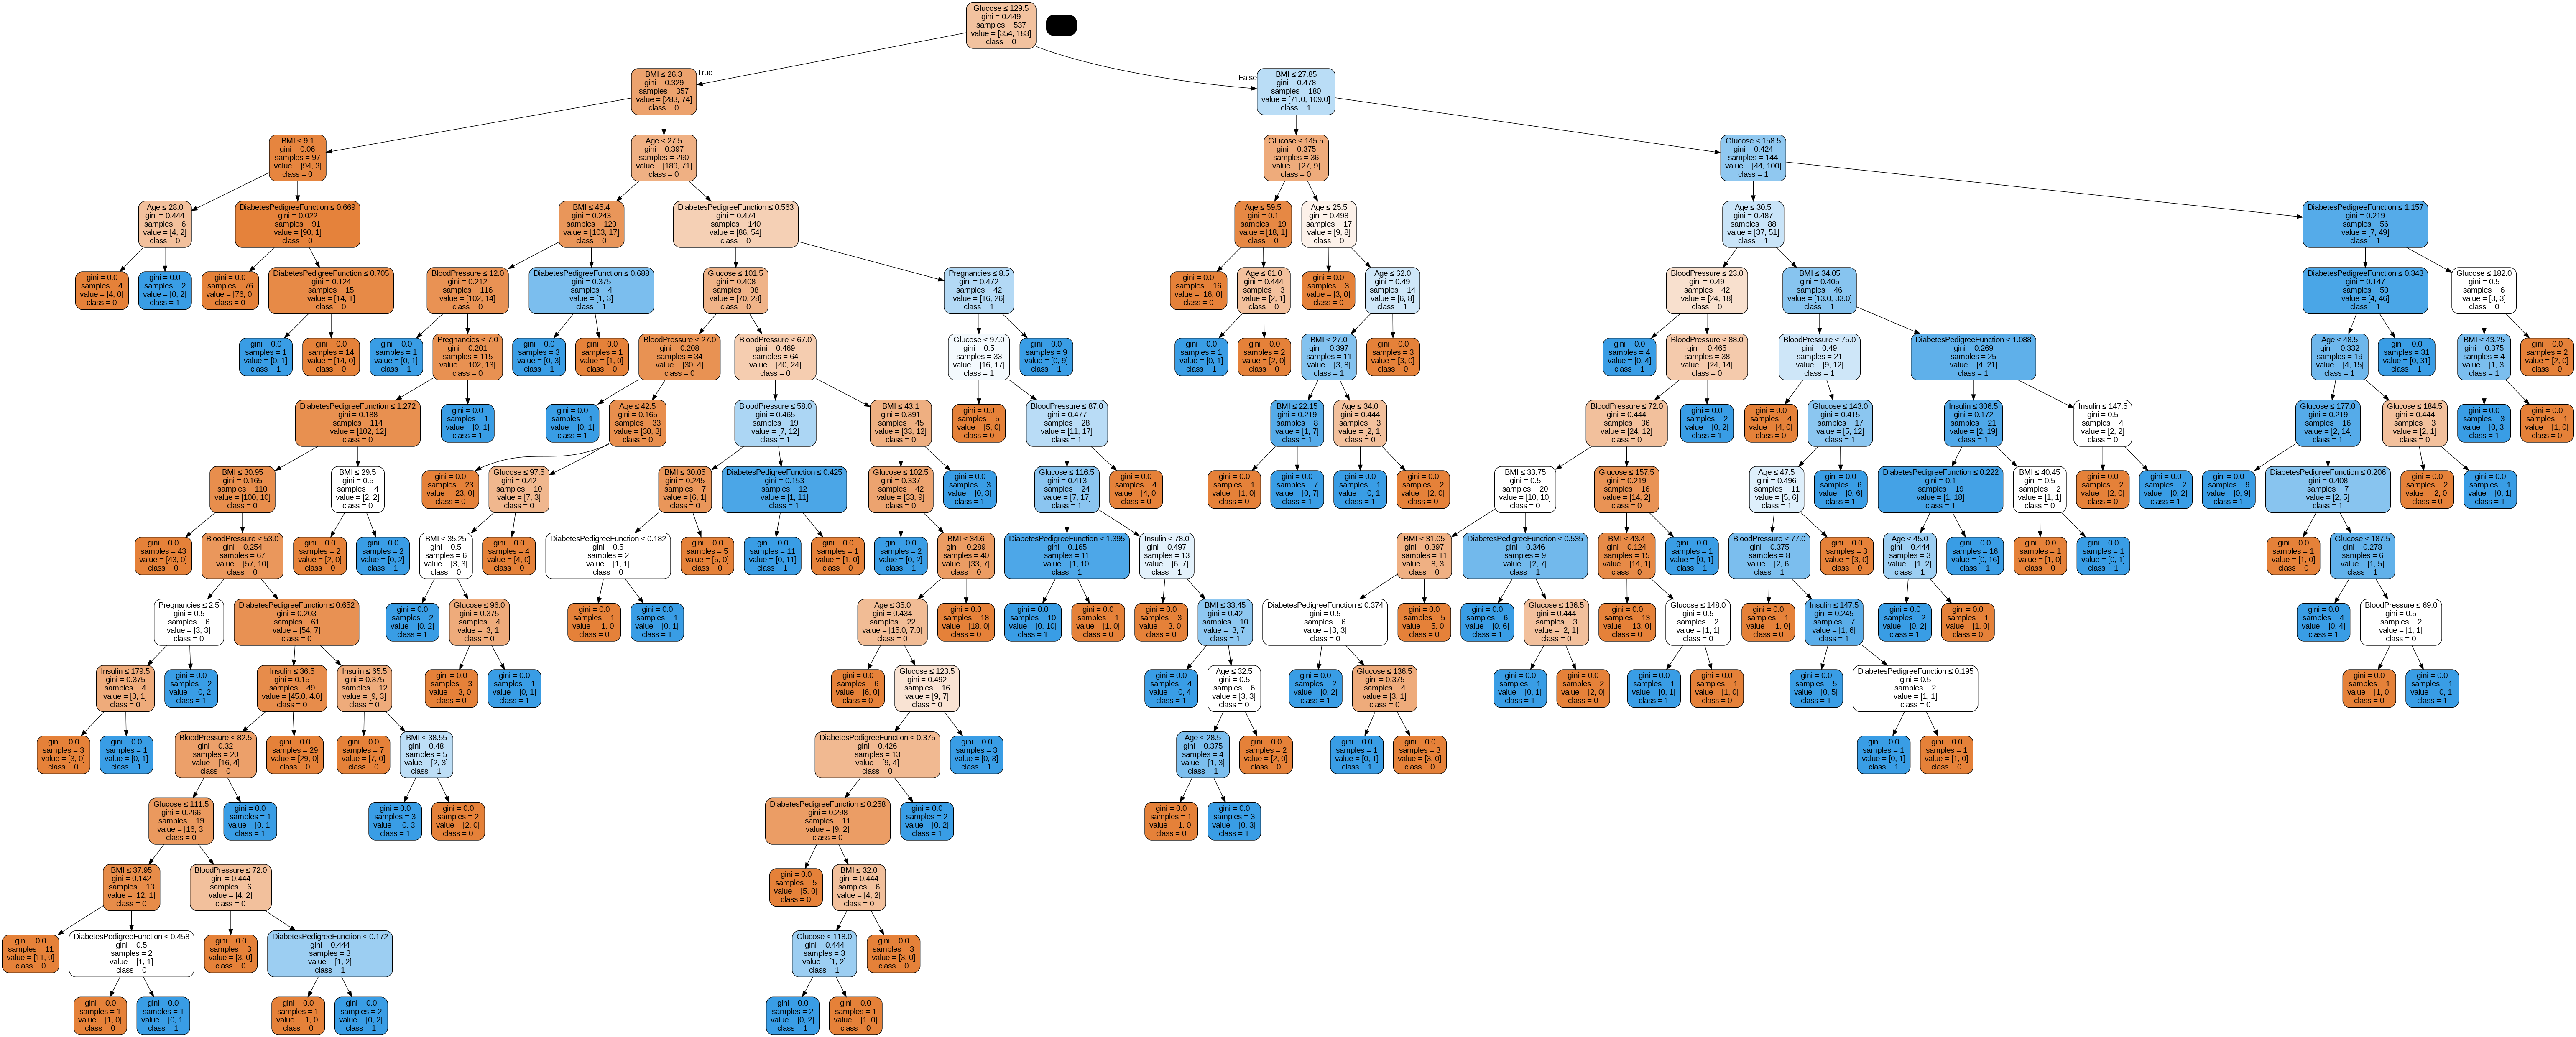

In [ ]:
# Visualize the Decision Tree
# Import required libraries for visualization
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Create a dot data object
dot_data = StringIO()

export_graphviz(clf,                  # Your trained Decision Tree
                out_file=dot_data,
                filled=True,         # Color nodes by class
                rounded=True,        # Rounded corners
                special_characters=True,
                feature_names=feature_cols,  # Features used
                class_names=['0','1'])       # Class names (No Diabetes=0, Diabetes=1)

# Convert to graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save tree as PNG (optional)
graph.write_png('diabetes_tree.png')

# Display tree in notebook
Image(graph.create_png())


In [ ]:
# Optimizing Decision Tree Performance

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create a pruned tree
clf_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)

# Train it
clf_pruned.fit(X_train, y_train)

# Predict
y_pred_pruned = clf_pruned.predict(X_test)

# Check accuracy
print("Pruned Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.7705627705627706


Pruned Tree Accuracy: 0.7705627705627706


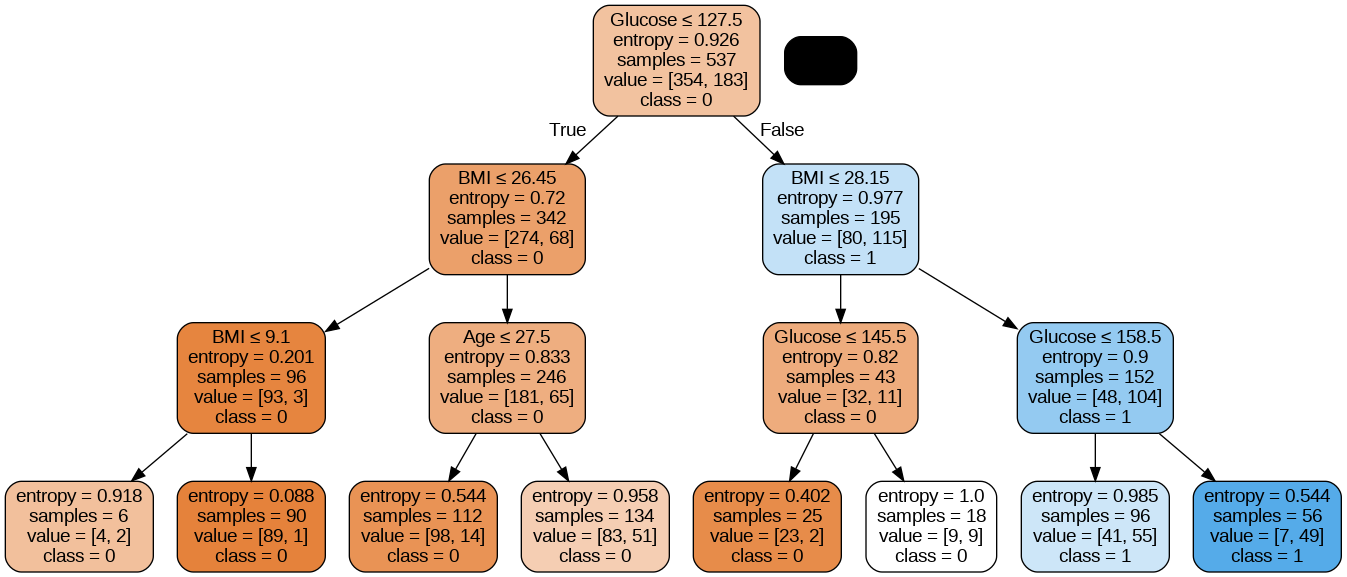

In [ ]:
# Visualizing Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

# Create a pruned Decision Tree (limit depth to 3)
clf_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)

# Train the pruned tree
clf_pruned.fit(X_train, y_train)

# Predict on test set
y_pred_pruned = clf_pruned.predict(X_test)

# Check accuracy
print("Pruned Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_pruned))

# Visualize the pruned tree
dot_data = StringIO()
export_graphviz(clf_pruned,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
from sklearn import metrics

# Detailed classification report
print(metrics.classification_report(y_test, y_pred_pruned))

# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_pruned)
print("Confusion Matrix:\n", cm)


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

Confusion Matrix:
 [[124  22]
 [ 31  54]]
